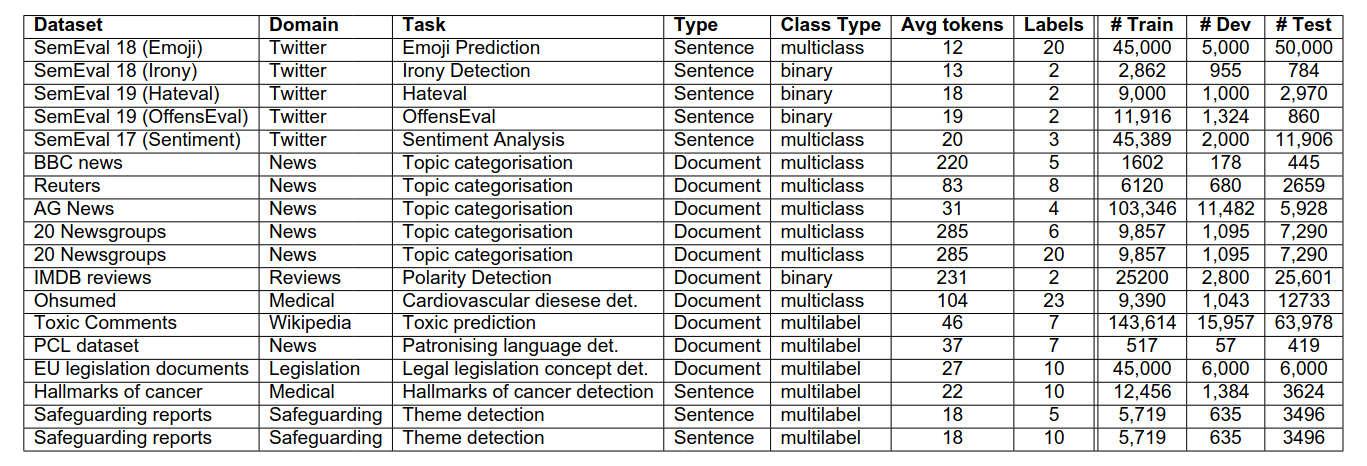

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sns.set(style="darkgrid")
import os
# Move to the parent directory
if os.path.basename(os.getcwd()) == "mycode":
    os.chdir("..")

def basic_analysis(df):
    """
    df should be a pandas DataFrame with the columns 'text' and 'label'
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # ---- 1️ WordCloud ----
    text_corpus = " ".join(str(text) for text in df["text"])
    wordcloud = WordCloud(width=800, height=800, background_color="white", colormap="viridis").generate(text_corpus)
    axes[0].imshow(wordcloud, interpolation="bilinear")
    axes[0].axis("off")
    axes[0].set_title("WordCloud of Dataset")

    # ---- 2️ Pie Chart for Label Distribution ----
    label_counts = df["label"].value_counts()

    # Reduce label size if too many labels
    if len(label_counts) >= 10:  
        label_fontsize = 8  
    else:
        label_fontsize = 12  
    axes[1].pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", 
                colors=plt.cm.Paired.colors, textprops={'fontsize': label_fontsize})
    axes[1].set_title("Label Distribution")

    # ---- 3️ Text Length Distribution ----
    df["text_length"] = df["text"].apply(lambda x: len(str(x).split()))  # Count words
    # Filter the dataset (just for visualization purposes)
    threshold = df["text_length"].quantile(0.995)  # Keep 95% of data
    filtered_df = df[df["text_length"] <= threshold]

    sns.histplot(filtered_df["text_length"], bins=30, kde=False, ax=axes[2])
    axes[2].set_title("Text Length Distribution")
    axes[2].set_xlabel("Number of words")
    axes[2].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()

    print(f"Number of train samples: {len(df)}")
    print(f"Set of labels: {set(df['label'])}")
    print(f"Number of labels: {len(set(df['label']))}")
    print(f"Missing Values: \n{df.isnull().sum()}", sep="")
    print("\nWord Count Statistics:")
    print(df["text_length"].describe().round(2))

    return None


# AG News

0                                                  1  \
0  1000_train         Hartford executive #39;s stock sale probed   
1  1001_train                                 Cool Batman Photo!   
2  1002_train  Stocky Monkey in Himalayas Becomes Newest Prim...   
3  1003_train                Bush, Kerry Don''t Worry About Tech   
4  1004_train                   The Teeming Crowd in Video Games   

                                                   2         3  
0  New York AG is investigating the timing of a s...  Business  
1  In related news, it was announced yesterday th...  Sci/Tech  
2  Scientists from India working in the Himalayas...  Sci/Tech  
3  Election Day is less than two weeks away, but ...  Sci/Tech  
4  Jeffrey Griffiths, the president and chief exe...  Sci/Tech

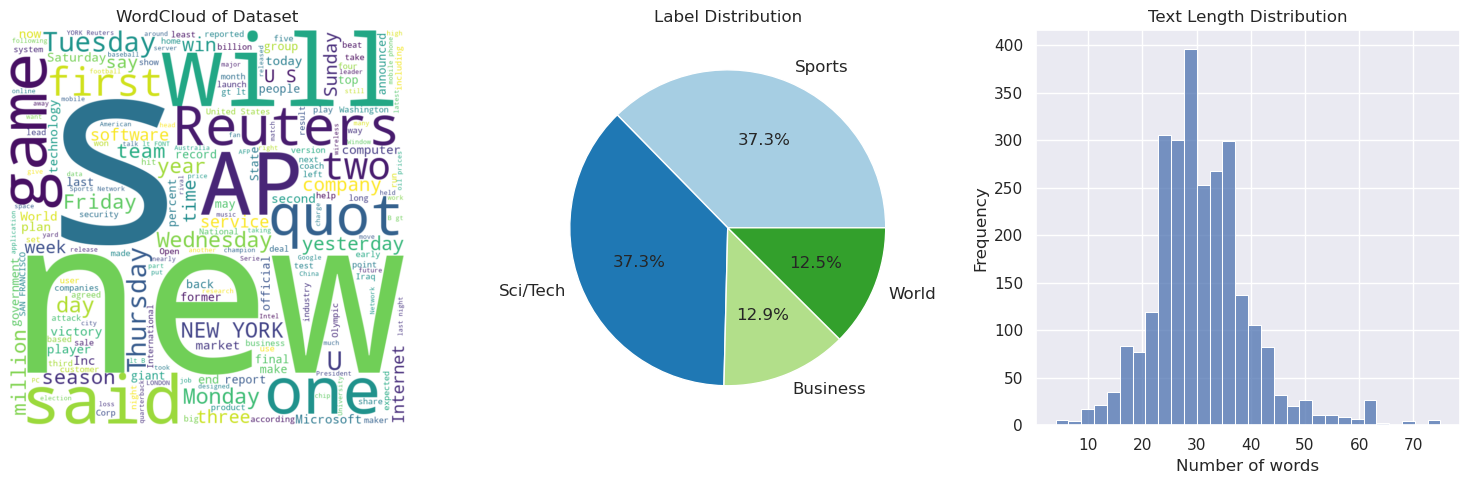

Number of train samples: 2679
Set of labels: {'Sports', 'Sci/Tech', 'World', 'Business'}
Number of labels: 4
Missing Values: 
0              0
1              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    2679.00
mean       31.26
std        10.13
min         4.00
25%        26.00
50%        30.00
75%        36.00
max       130.00
Name: text_length, dtype: float64


In [2]:
df = pd.read_csv("LREC-COLING/train/agnewstrainAll.csv")
display(df.head())
df = df.rename(columns={"2": "text", "3": "label"})
basic_analysis(df)

# BCC News

0                                                  1              2
0  1491  Jones medals 'must go if guilty'  World Anti-D...          sport
1  2002  Britons growing 'digitally obese'  Gadget love...           tech
2  1573  Wenger steps up row  Arsene Wenger has stepped...          sport
3  1841  Domain system scam fear  A system to make it e...           tech
4   611  Lopez misses UK charity premiere  Jennifer Lop...  entertainment

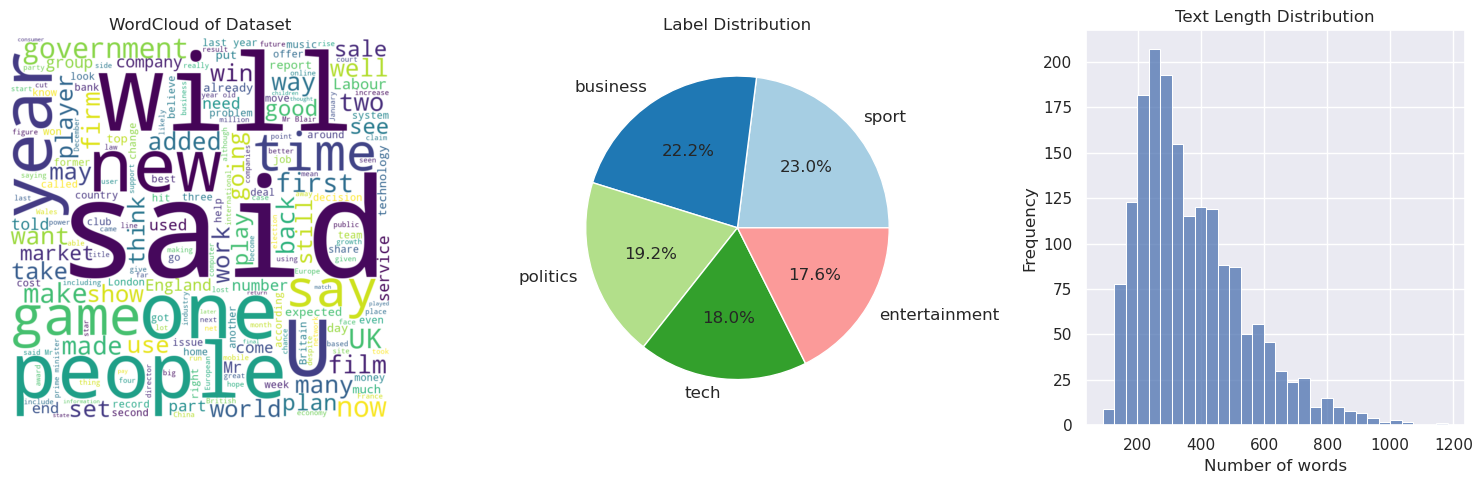

Number of train samples: 1779
Set of labels: {'politics', 'business', 'tech', 'entertainment', 'sport'}
Number of labels: 5
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    1779.00
mean      380.13
std       227.44
min        89.00
25%       245.00
50%       328.00
75%       468.00
max      4432.00
Name: text_length, dtype: float64


In [3]:
df = pd.read_csv("LREC-COLING/train/bbcdatatrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# Hallmarks of cancer

0                                                  1  \
0  20179302.6  Collectively , our findings suggest that selen...   
1  12536240.4  NK cells and CD56(+) T cells from tumour-beari...   
2  12536240.5  The expression of CD94 and the KIR isotypes CD...   
3  12536240.6  Simultaneous ligation of CD158a , CD158b and K...   
4  12536240.7  Our results suggest that , while hepatic CD56(...   

                                  2  
0  ['tumor promoting inflammation']  
1   ['avoiding immune destruction']  
2   ['avoiding immune destruction']  
3   ['avoiding immune destruction']  
4   ['avoiding immune destruction']

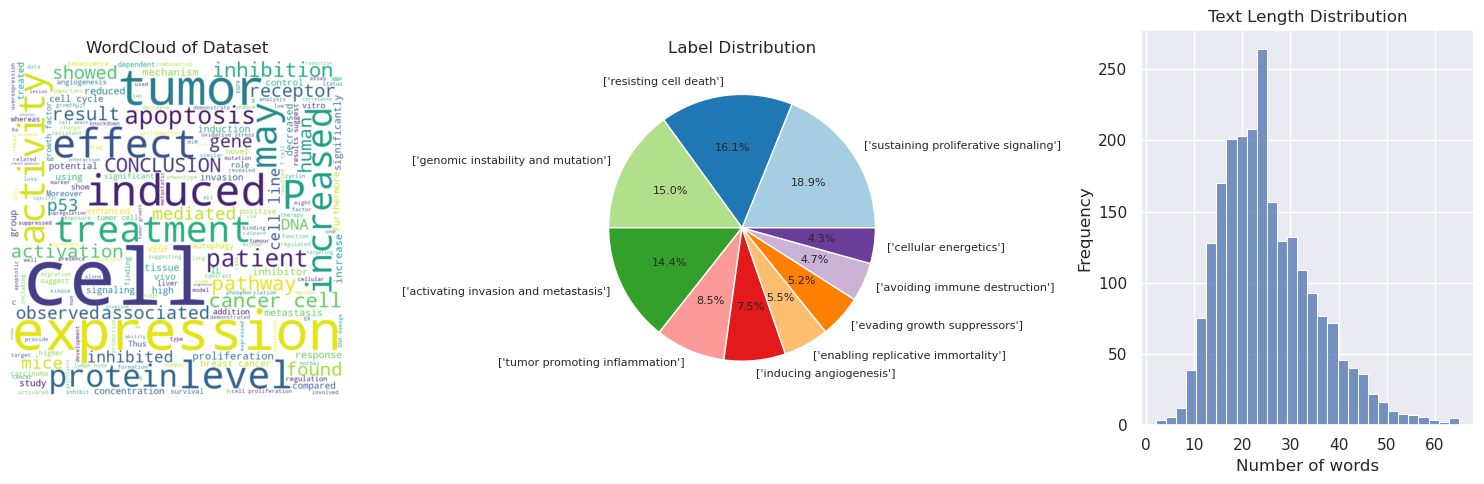

Number of train samples: 2292
Set of labels: {"['inducing angiogenesis']", "['genomic instability and mutation']", "['enabling replicative immortality']", "['cellular energetics']", "['evading growth suppressors']", "['tumor promoting inflammation']", "['avoiding immune destruction']", "['sustaining proliferative signaling']", "['activating invasion and metastasis']", "['resisting cell death']"}
Number of labels: 10
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    2292.00
mean       25.51
std        10.60
min         2.00
25%        18.00
50%        24.00
75%        31.00
max       102.00
Name: text_length, dtype: float64


In [4]:
df = pd.read_csv("LREC-COLING/train/cancertrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# EU legislation documents

0                                                  1  \
0  32006D0450  2006/450/EC: Council Decision of  27 June 2006...   
1  32005D0055  2005/55/EC: Commission Decision of 25 January ...   
2  32004R1934  Regulation (EC) No 1934/2004 of the European P...   
3  31996L0078  Commission Directive 96/78/EC of 6 December 19...   
4  32003D1608  Decision No 1608/2003/EC of the European Parli...   

                         2  
0   ['cooperation policy']  
1            ['vegetable']  
2   ['cooperation policy']  
3  ['customs regulations']  
4   ['cooperation policy']

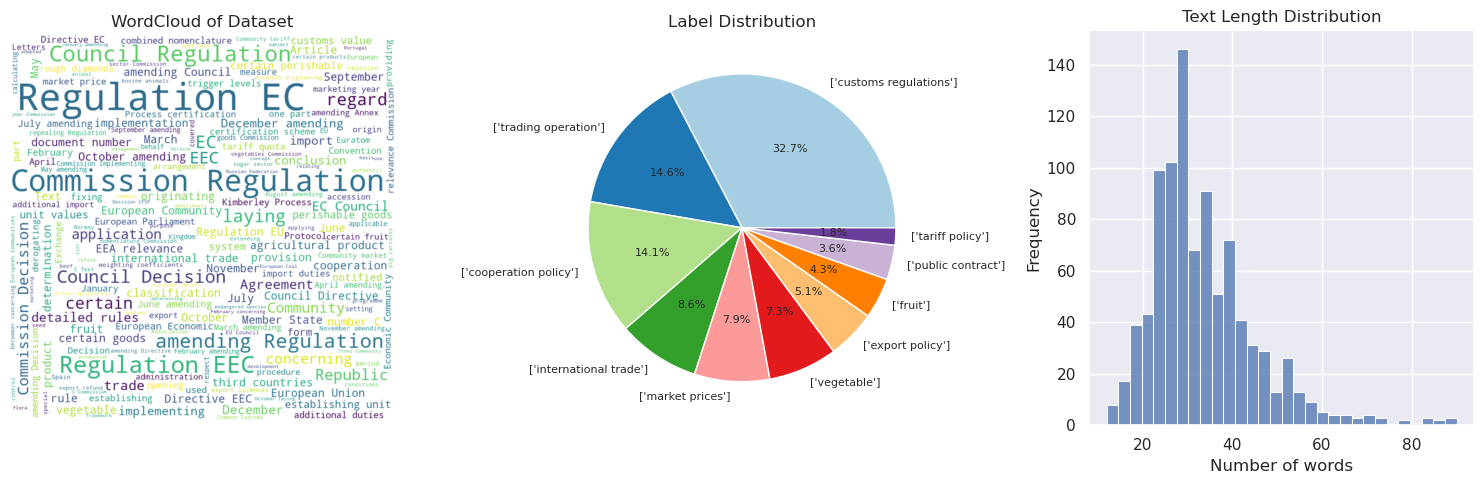

Number of train samples: 937
Set of labels: {"['public contract']", "['vegetable']", "['tariff policy']", "['market prices']", "['international trade']", "['customs regulations']", "['fruit']", "['trading operation']", "['export policy']", "['cooperation policy']"}
Number of labels: 10
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    937.00
mean      33.85
std       12.84
min       12.00
25%       26.00
50%       31.00
75%       39.00
max      101.00
Name: text_length, dtype: float64


In [5]:
df = pd.read_csv("LREC-COLING/train/legaldatatrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# 20 Newsgroups (6 labels)

0                                                  1           2
0     0_train  I was wondering if anyone out there could enli...  recreation
1     1_train  A fair number of brave souls who upgraded thei...   computers
2    10_train  I have a line on a Ducati 900GTS 1978 model wi...  recreation
3   100_train  / hpcc01:rec.motorcycles / Stafford@Vax2.Winon...  recreation
4  1000_train  Heavy-duty, commercial, TINY,(6x3x1/2 inch) WA...    for sale

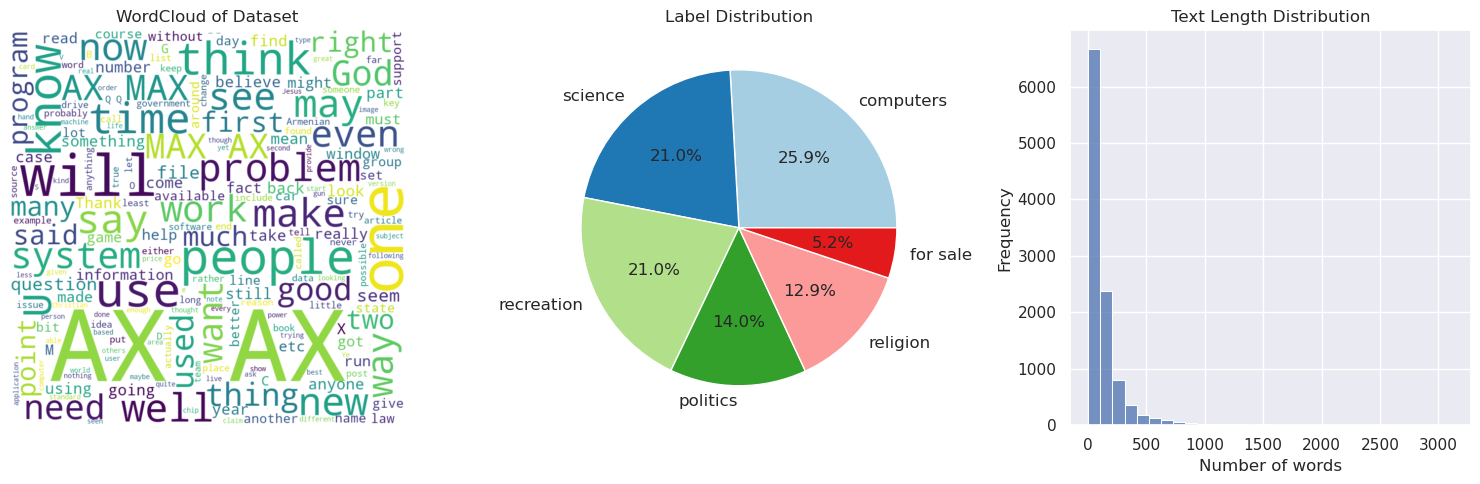

Number of train samples: 10952
Set of labels: {'recreation', 'religion', 'science', 'for sale', 'politics', 'computers'}
Number of labels: 6
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    10952.00
mean       175.90
std        497.27
min          1.00
25%         40.00
50%         80.00
75%        158.00
max      11694.00
Name: text_length, dtype: float64


In [6]:
df = pd.read_csv("LREC-COLING/train/newsgroups6trainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# 20 Newsgroups (20 labels)

0                                                  1             2
0     0_train  I was wondering if anyone out there could enli...         autos
1     1_train  A fair number of brave souls who upgraded thei...  mac hardware
2    10_train  I have a line on a Ducati 900GTS 1978 model wi...   motorcycles
3   100_train  / hpcc01:rec.motorcycles / Stafford@Vax2.Winon...   motorcycles
4  1000_train  Heavy-duty, commercial, TINY,(6x3x1/2 inch) WA...      for sale

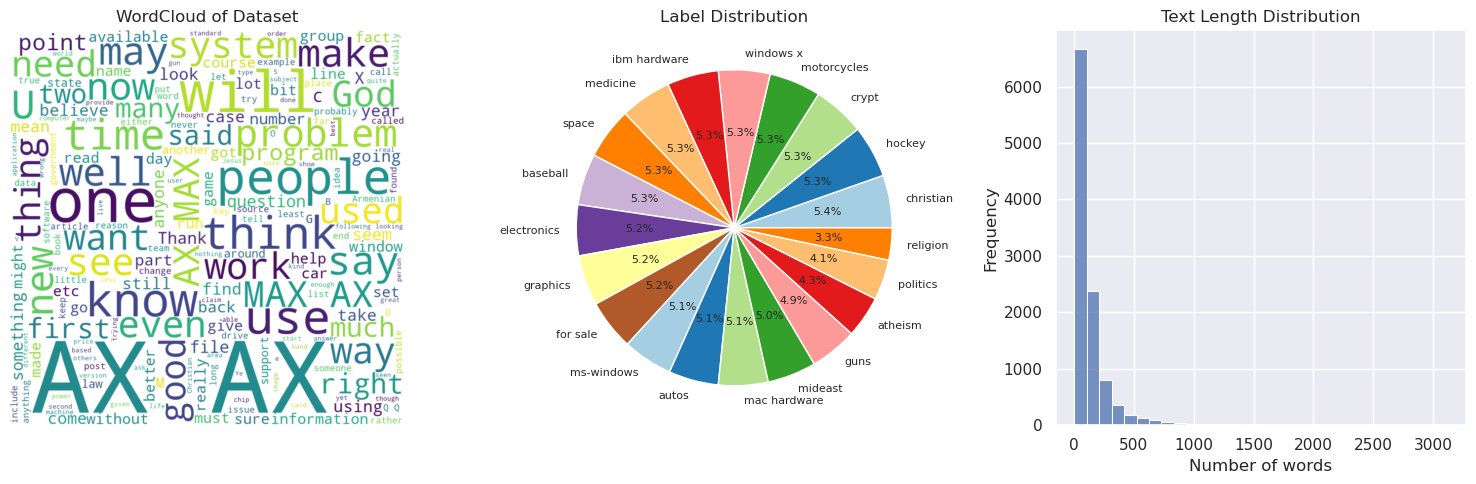

Number of train samples: 10952
Set of labels: {'baseball', 'christian', 'hockey', 'autos', 'mideast', 'politics', 'windows x', 'space', 'graphics', 'ibm hardware', 'crypt', 'ms-windows', 'mac hardware', 'religion', 'for sale', 'electronics', 'motorcycles', 'guns', 'medicine', 'atheism'}
Number of labels: 20
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    10952.00
mean       175.90
std        497.27
min          1.00
25%         40.00
50%         80.00
75%        158.00
max      11694.00
Name: text_length, dtype: float64


In [7]:
df = pd.read_csv("LREC-COLING/train/newsgroups20trainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# Ohsumed

0                                                  1  \
0  1  Improved outcome at 28 days of age for very lo...   
1  2  Chylothorax after posterior spinal instrumenta...   
2  3  Childhood pulmonary function following hyaline...   
3  4  Treatment of atelectasis of upper lung lobes. ...   
4  5  Decision analysis, public health policy, and i...   

                            2  
0  Respiratory Tract Diseases  
1  Respiratory Tract Diseases  
2  Respiratory Tract Diseases  
3  Respiratory Tract Diseases  
4  Respiratory Tract Diseases

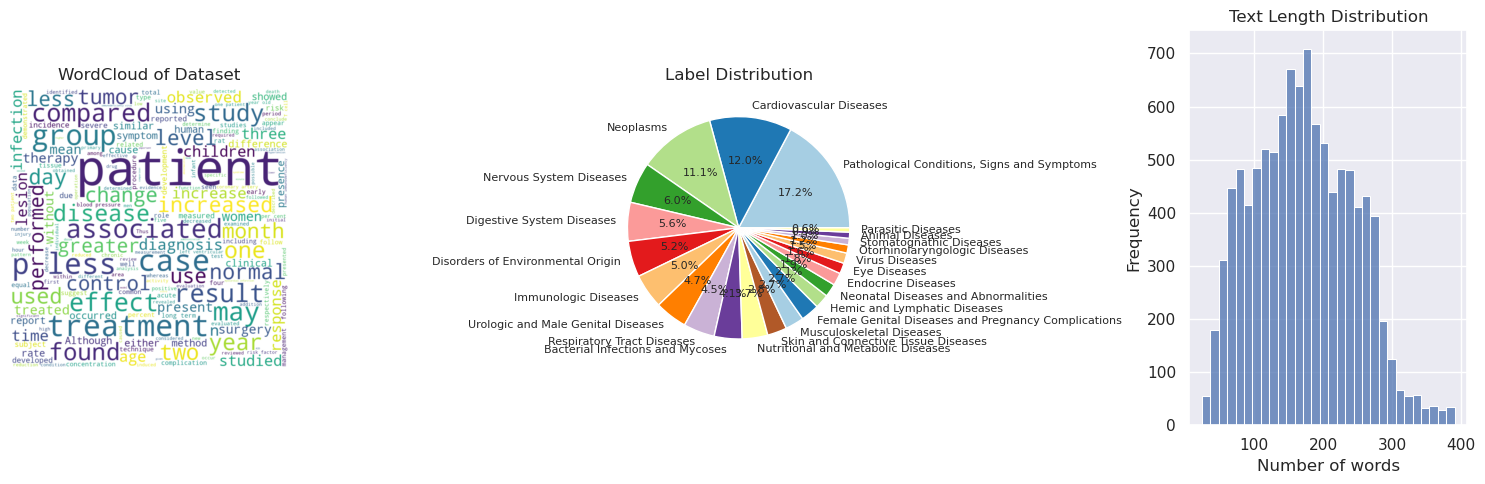

Number of train samples: 10433
Set of labels: {'Disorders of Environmental Origin', 'Respiratory Tract Diseases', 'Female Genital Diseases and Pregnancy Complications', 'Nutritional and Metabolic Diseases', 'Musculoskeletal Diseases', 'Bacterial Infections and Mycoses', 'Endocrine Diseases', 'Nervous System Diseases', 'Urologic and Male Genital Diseases', 'Otorhinolaryngologic Diseases', 'Pathological Conditions, Signs and Symptoms', 'Hemic and Lymphatic Diseases', 'Skin and Connective Tissue Diseases', 'Eye Diseases', 'Neonatal Diseases and Abnormalities', 'Neoplasms', 'Immunologic Diseases', 'Digestive System Diseases', 'Animal Diseases', 'Stomatognathic Diseases', 'Cardiovascular Diseases', 'Parasitic Diseases', 'Virus Diseases'}
Number of labels: 23
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    10433.0
mean       172.7
std         74.6
min         24.0
25%        115.0
50%        169.0
75%        2

In [8]:
df = pd.read_csv("LREC-COLING/train/ohsumedtrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# Reuters

0                                                  1         2
0  118    SEIPP SAYS GERMAN INTEREST RATES SHOULD FALL...  interest
1  119    U.K. MONEY DATA MAY EASE RATE CUT, ANALYSTS ...  interest
2  120    TREASURY BALANCES AT FED ROSE ON MARCH 23   ...  interest
3  121    BANK OF SPAIN SUSPENDS ASSISTANCE, DRAINS FU...  interest
4  122    FED SETS TWO BILLION DLR CUSTOMER REPURCHASE...  interest

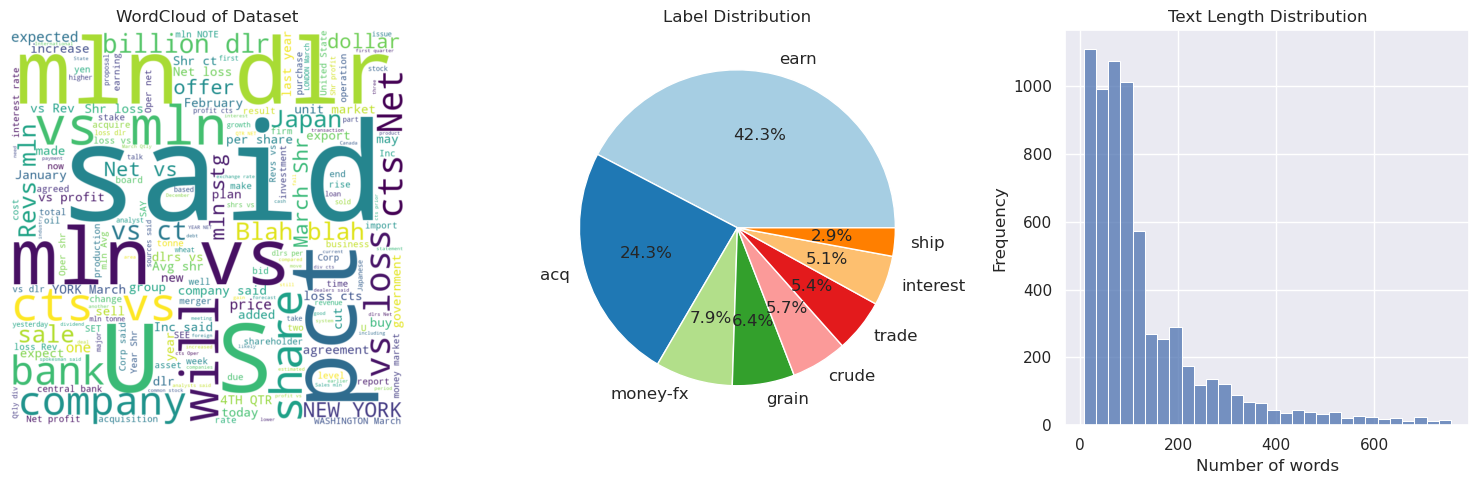

Number of train samples: 6800
Set of labels: {'trade', 'earn', 'interest', 'acq', 'money-fx', 'grain', 'crude', 'ship'}
Number of labels: 8
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    6800.00
mean      133.27
std       140.67
min         7.00
25%        48.00
50%        87.00
75%       163.00
max      1320.00
Name: text_length, dtype: float64


In [9]:
df = pd.read_csv("LREC-COLING/train/reuterstrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# IMDB reviews

0                                                  1  \
0      0_0_train_addition  Story of a man who has unnatural feelings for ...   
1      0_1_train_addition  Bromwell High is a cartoon comedy. It ran at t...   
2  10000_0_train_addition  Airport '77 starts as a brand new luxury 747 p...   
3  10000_1_train_addition  Homelessness (or Houselessness as George Carli...   
4  10001_0_train_addition  This film lacked something I couldn't put my f...   

          2  
0  negative  
1  positive  
2  negative  
3  positive  
4  negative

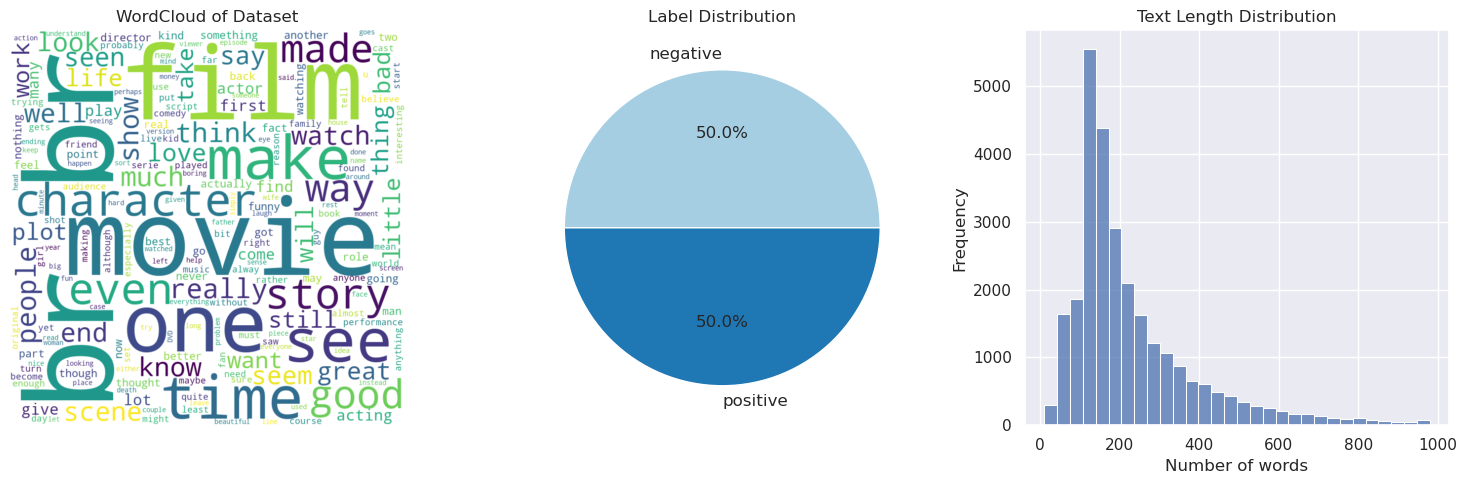

Number of train samples: 28000
Set of labels: {'negative', 'positive'}
Number of labels: 2
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    28000.00
mean       233.51
std        173.16
min         10.00
25%        127.00
50%        174.00
75%        285.00
max       2470.00
Name: text_length, dtype: float64


In [10]:
df = pd.read_csv("LREC-COLING/train/reviewstrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# SemEval 18 (Emoji) 

0                                                  1  \
0  1000000  Last stop @user before going back to Cali ️ #p...   
1   500001  Sunday afternoon walking through Venice in the...   
2   500002  Time for some BBQ and whiskey libations. Chomp...   
3   500003  Love love love all these people ️ ️ ️ #friends...   
4   500004                                ️ ️ ️ ️ @ Toys"R"Us   

                          2  
0                       sun  
1                       sun  
2  winking face with tongue  
3                 red heart  
4                 red heart

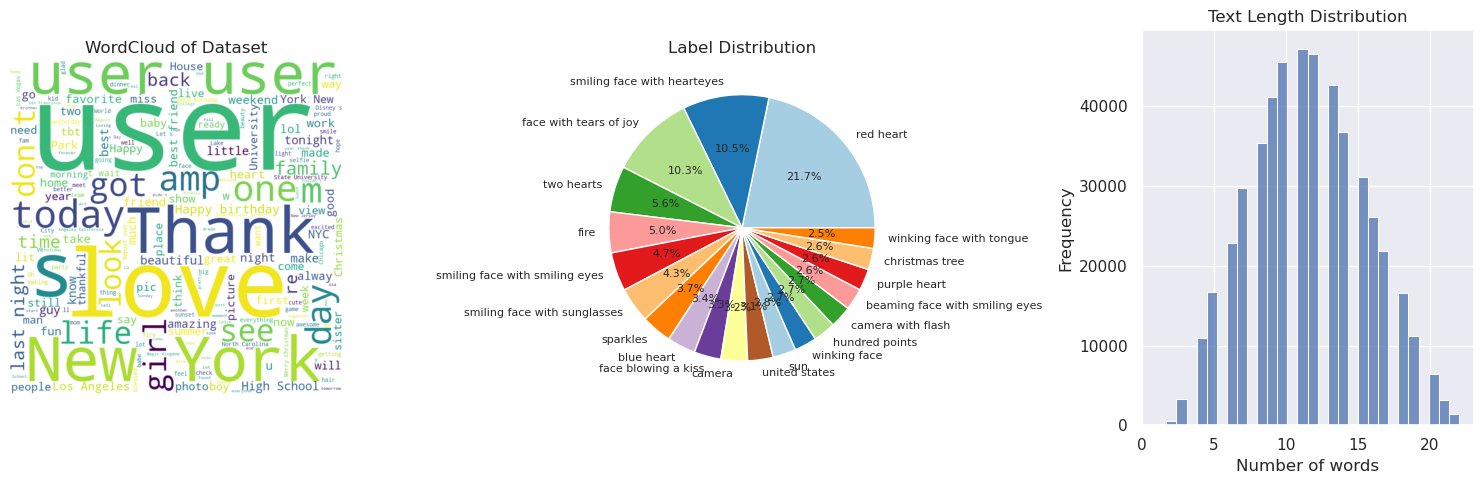

Number of train samples: 500000
Set of labels: {'blue heart', 'face with tears of joy', 'camera with flash', 'smiling face with hearteyes', 'red heart', 'purple heart', 'united states', 'smiling face with sunglasses', 'face blowing a kiss', 'winking face with tongue', 'smiling face with smiling eyes', 'fire', 'beaming face with smiling eyes', 'winking face', 'sparkles', 'sun', 'two hearts', 'christmas tree', 'camera', 'hundred points'}
Number of labels: 20
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    500000.00
mean         11.59
std           4.07
min           1.00
25%           9.00
50%          11.00
75%          14.00
max          42.00
Name: text_length, dtype: float64


In [11]:
df = pd.read_csv("LREC-COLING/train/semevalEmojitrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# SemEval 18 (Irony) 

0                                                  1          2
0  0  seeing ppl walking w/ crutches makes me really...      irony
1  1  look for the girl with the broken smile, ask h...  non irony
2  2  Now I remember why I buy books online @user #s...      irony
3  3  @user @user So is he banded from wearing the c...      irony
4  4  Just found out there are Etch A Sketch apps.  ...      irony

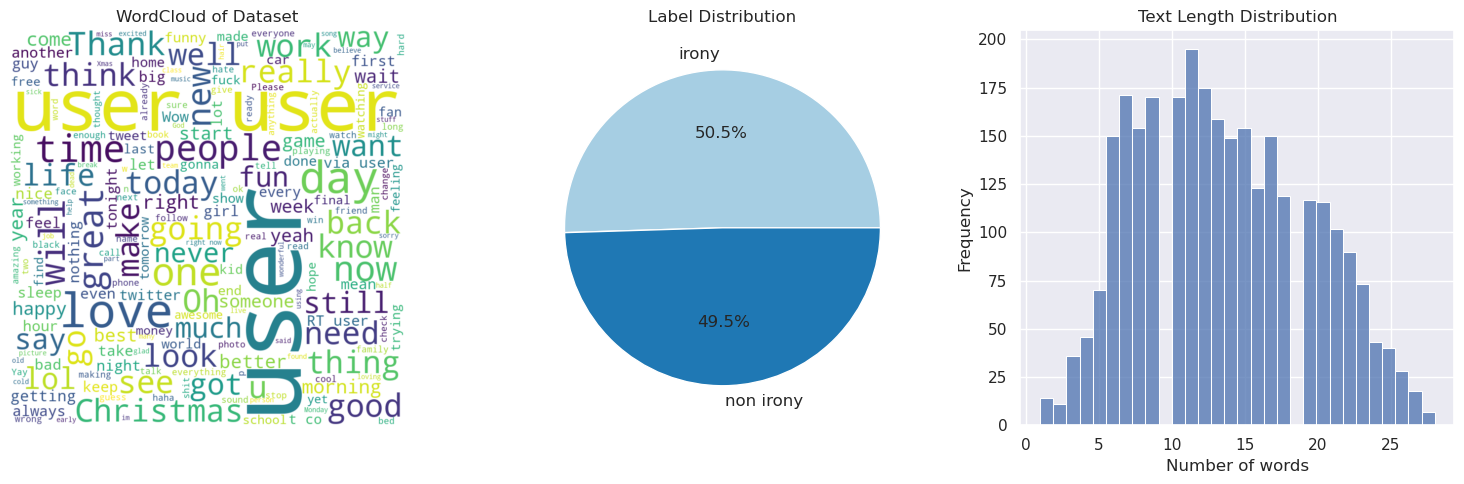

Number of train samples: 2862
Set of labels: {'non irony', 'irony'}
Number of labels: 2
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    2862.00
mean       13.61
std         6.69
min         1.00
25%         9.00
50%        13.00
75%        18.00
max       177.00
Name: text_length, dtype: float64


In [12]:
df = pd.read_csv("LREC-COLING/train/semevalironytrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# SemEval 19 (Hateval) 

0                                                  1         2
0  0  @user nice new signage. Are you not concerned ...  non-hate
1  1  A woman who you fucked multiple times saying y...      hate
2  2  @user @user real talk do you have eyes or were...      hate
3  3  your girlfriend lookin at me like a groupie in...      hate
4  4                        Hysterical woman like @user  non-hate

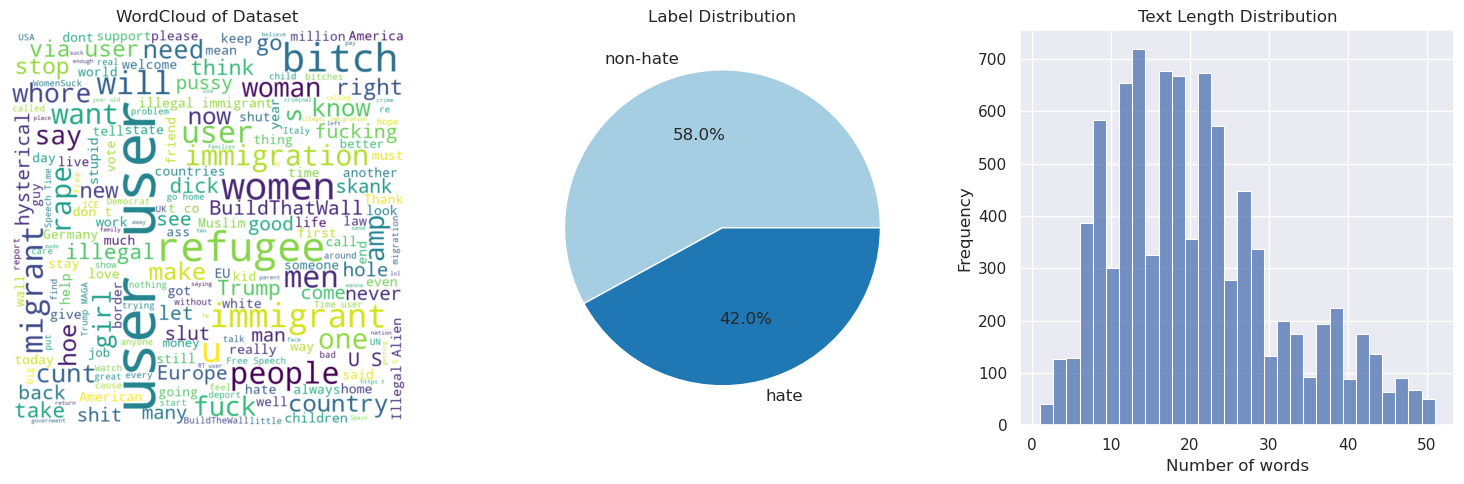

Number of train samples: 9000
Set of labels: {'non-hate', 'hate'}
Number of labels: 2
Missing Values: 
0              0
text           7
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    9000.00
mean       20.82
std        10.87
min         1.00
25%        13.00
50%        19.00
75%        27.00
max        63.00
Name: text_length, dtype: float64


In [13]:
df = pd.read_csv("LREC-COLING/train/semevalhatetrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# SemEval 19 (OffensEval) 

0                                                  1              2
0  0  @user Bono... who cares. Soon people will unde...  non-offensive
1  1  @user Eight years the republicans denied obama...      offensive
2  2  @user Get him some line help. He is gonna be j...  non-offensive
3  3                @user @user She is great. Hi Fiona!  non-offensive
4  4  @user She has become a parody unto herself? Sh...      offensive

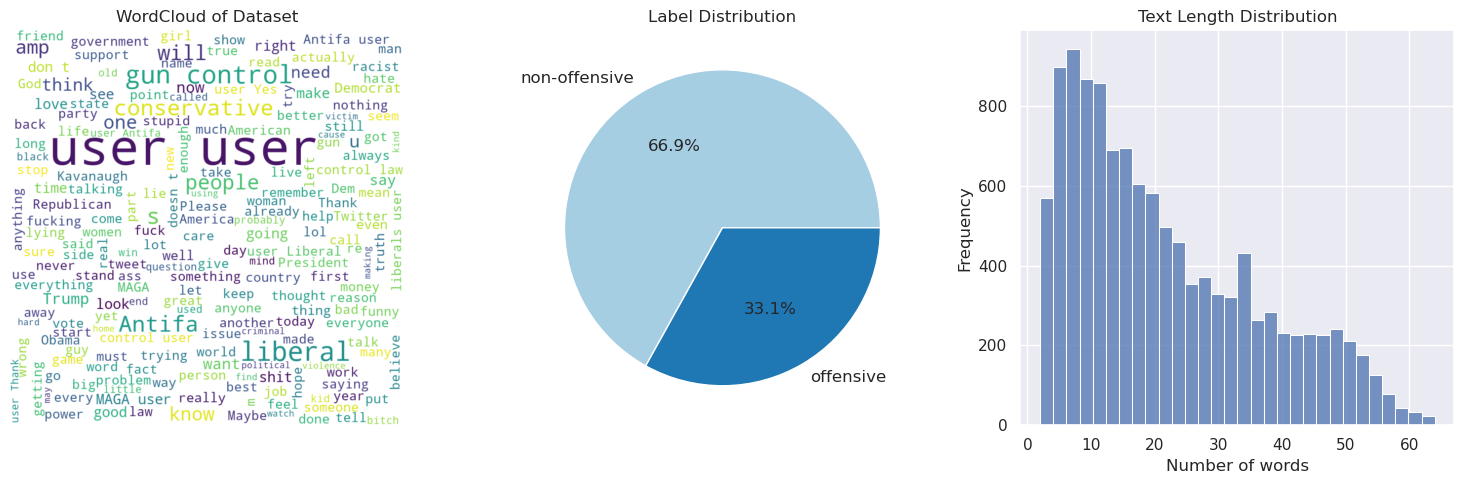

Number of train samples: 11916
Set of labels: {'non-offensive', 'offensive'}
Number of labels: 2
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    11916.00
mean        22.02
std         15.05
min          2.00
25%         10.00
50%         18.00
75%         32.00
max        103.00
Name: text_length, dtype: float64


In [14]:
df = pd.read_csv("LREC-COLING/train/semevaloffensivetrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# SemEval 17 (Sentiment)

0                                                  1         2
0  0  "QT @user In the original draft of the 7th boo...  positive
1  1  "Ben Smith / Smith (concussion) remains out of...   neutral
2  2  Sorry bout the stream last night I crashed out...   neutral
3  3  Chase Headley's RBI double in the 8th inning o...   neutral
4  4  @user Alciato: Bee will invest 150 million in ...  positive

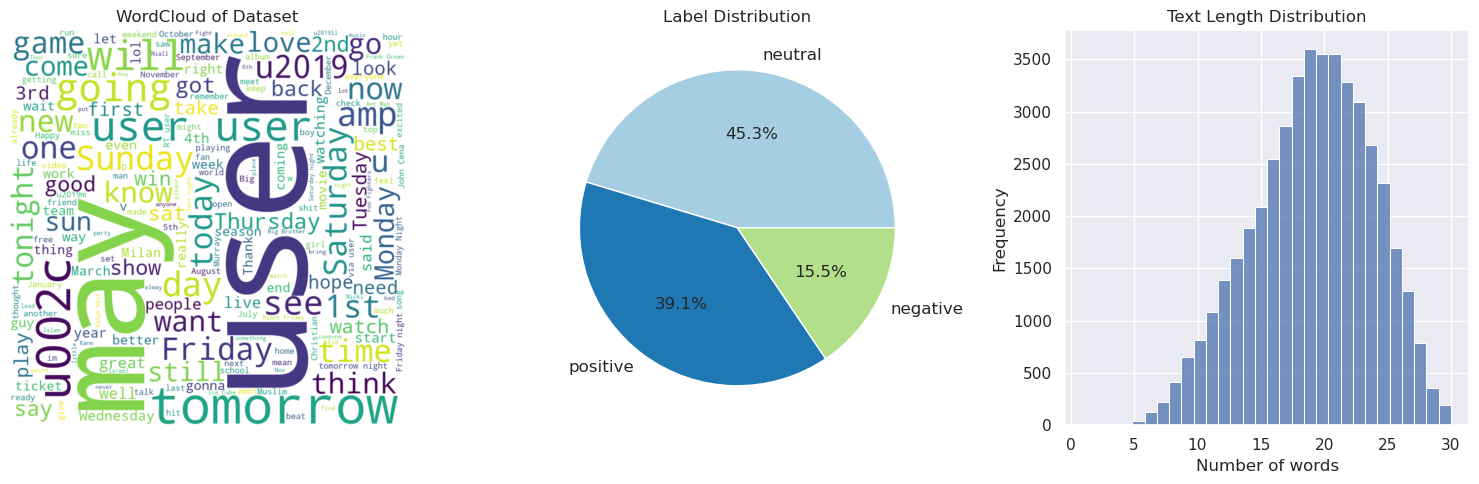

Number of train samples: 45615
Set of labels: {'neutral', 'positive', 'negative'}
Number of labels: 3
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    45615.00
mean        19.24
std          4.94
min          1.00
25%         16.00
50%         20.00
75%         23.00
max         35.00
Name: text_length, dtype: float64


In [15]:
df = pd.read_csv("LREC-COLING/train/semevalSentimenttrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

# Toxic Comments

0                                                  1  \
0  0000997932d777bf  ExplanationWhy the edits made under my usernam...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  MoreI can't make any real suggestions on impro...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   

               2  
0  ['non-toxic']  
1  ['non-toxic']  
2  ['non-toxic']  
3  ['non-toxic']  
4  ['non-toxic']

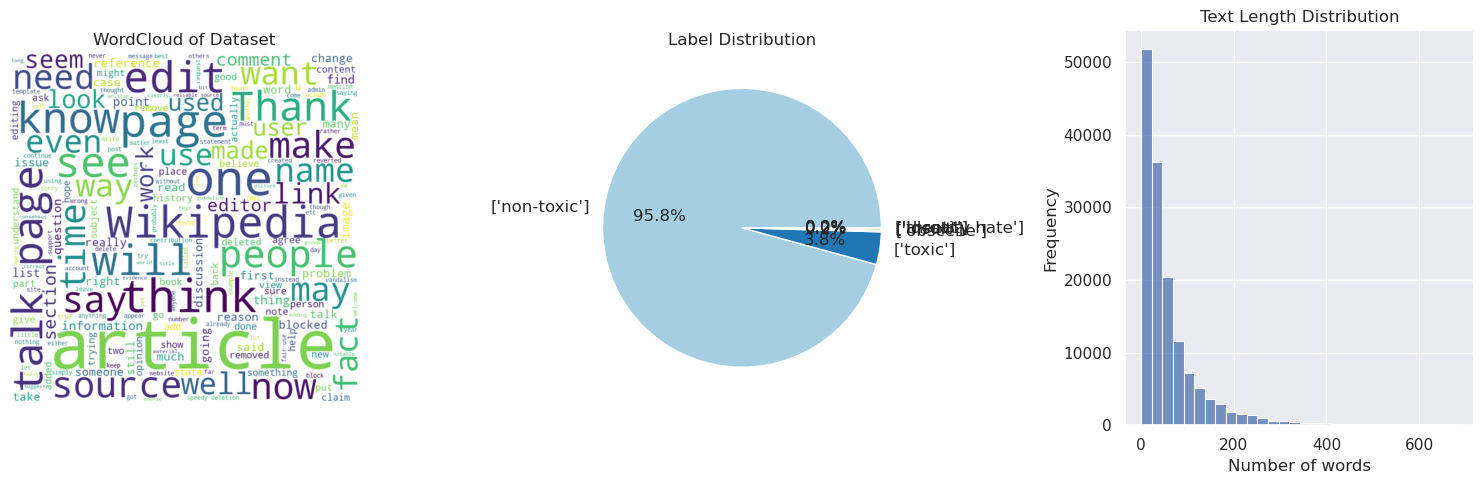

Number of train samples: 149706
Set of labels: {"['identity hate']", "['insult']", "['obscene']", "['threat']", "['toxic']", "['non-toxic']"}
Number of labels: 6
Missing Values: 
0              0
text           0
label          0
text_length    0
dtype: int64

Word Count Statistics:
count    149706.00
mean         67.29
std          97.11
min           1.00
25%          17.00
50%          36.00
75%          76.00
max        1411.00
Name: text_length, dtype: float64


In [16]:
df = pd.read_csv("LREC-COLING/train/toxictrainAll.csv")
display(df.head())
df = df.rename(columns={"1": "text", "2": "label"})
basic_analysis(df)

| Dataset                    | Domain      | Task                                  | Type      | Class Type | avg # words | Labels | # Train samples  |
|----------------------------|-------------|---------------------------------------|-----------|------------|-------------|--------|----------|
| SemEval 18 (Emoji)         | Twitter     | Emoji Prediction                      | Sentence  | multiclass | 12          | 20     | 500,000   |
| SemEval 18 (Irony)         | Twitter     | Irony Detection                       | Sentence  | binary     | 12          | 2      | 2,862     |
| SemEval 19 (HatEval)       | Twitter     | Hateval                               | Sentence  | binary     | 21          | 2      | 9,000     |
| SemEval 19 (OffensEval)    | Twitter     | OffensEval                            | Sentence  | binary     | 22          | 2      | 11,916    |
| SemEval 17 (Sentiment)     | Twitter     | Sentiment Analysis                    | Sentence  | multiclass | 19          | 3      | 45,615    |
| BBC news                   | News        | Topic categorisation                  | Document  | multiclass | 380         | 5      | 1,779     |
| Reuters                    | News        | Topic categorisation                  | Document  | multiclass | 133         | 8      | 6,800     |
| AG News                    | News        | Topic categorisation                  | Document  | multiclass | 31          | 4      | 2,679     |
| 20 Newsgroups              | News        | Topic categorisation                  | Document  | multiclass | 176         | 6      | 10,952    |
| 20 Newsgroups              | News        | Topic categorisation                  | Document  | multiclass | 176         | 20     | 10,952    |
| IMDB reviews               | Reviews     | Polarity Detection                    | Document  | binary     | 234         | 2      | 28,000    |
| Ohsumed                    | Medical     | Cardiovascular disease det.           | Document  | multiclass | 173         | 23     | 10,433    |
| Toxic Comments             | Wikipedia   | Toxic prediction                      | Document  | multilabel | 67          | 6 (7 in paper)      | 149,706  |
| EU legislation documents   | Legislation | Legal legislation concept det.        | Document  | multilabel | 33          | 10     | 937    |
| Hallmarks of cancer        | Medical     | Hallmarks of cancer detection         | Sentence  | multilabel | 25          | 10     | 2,292   |
